#  Processing Data with Pandas

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Create a data frame json file

df = pd.read_json("../DATA/asset_data_analysis.json",orient="split")

df.tail()

,date,products,sales,costs
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


In [3]:
# Create copy of the data frame

df_copy = df.copy()
df_copy.tail() 


,date,products,sales,costs
3,2021-11-07,cars,15900,10910
4,2021-12-06,boats,12087,7087
5,2021-12-09,cars,56897,40447
6,2021-11-10,cars,11879,5879
7,2021-12-06,houses,19345,13451


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      8 non-null      datetime64[ns]
 1   products  8 non-null      object        
 2   sales     8 non-null      int64         
 3   costs     8 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
# Convert date column to datetime

df_copy["date"] = pd.to_datetime(df_copy["date"])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      8 non-null      datetime64[ns]
 1   products  8 non-null      object        
 2   sales     8 non-null      int64         
 3   costs     8 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
# Set date column as index for data frame

df_copy = df_copy.set_index("date", drop=False)
df_copy.head()

,date,products,sales,costs
date,,,,
2021-11-20,2021-11-20,cars,19234,12340
2021-12-12,2021-12-12,boats,87598,67568
2021-12-06,2021-12-06,houses,20989,11999
2021-11-07,2021-11-07,cars,15900,10910
2021-12-06,2021-12-06,boats,12087,7087


In [7]:
# Create line plot of sales and date

# Group dataframe by index or date
df_grouped = df_copy.groupby(by =df_copy.index).sum(numeric_only=True)
df_grouped.head()

,sales,costs
date,,
2021-11-07,15900,10910
2021-11-10,11879,5879
2021-11-20,19234,12340
2021-12-06,52421,32537
2021-12-09,56897,40447


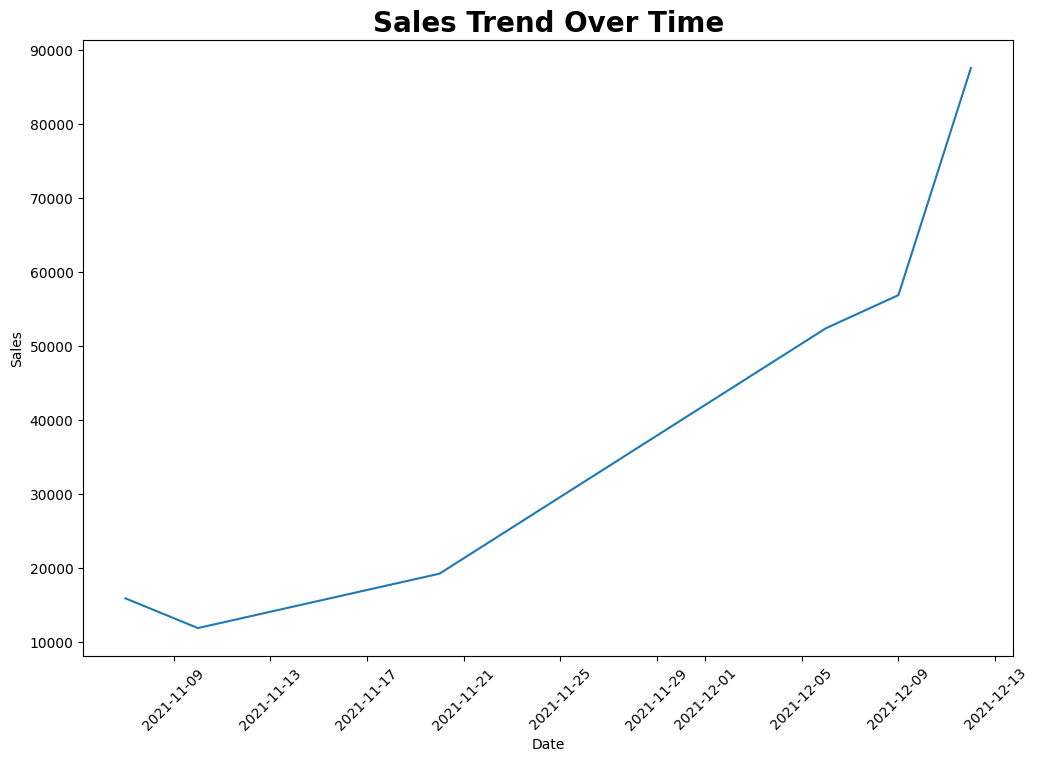

In [8]:
# Line plot of sales and date
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_grouped.index,df_grouped["sales"])
ax.set(xlabel="Date",ylabel="Sales")
plt.title(label="Sales Trend Over Time",
          fontdict={"fontsize":20,
                    "fontweight":"bold"})
plt.xticks(rotation=45)
plt.show()


In [9]:
# Hierarchical index for date as outer index

df_hie = df.set_index(["date","products"])
df_hie.head()

,,sales,costs
date,products,,
2021-11-20,cars,19234,12340
2021-12-12,boats,87598,67568
2021-12-06,houses,20989,11999
2021-11-07,cars,15900,10910
2021-12-06,boats,12087,7087


In [10]:
# Profit of houses on December 12,2021

# Sales of houses on December 12, 2021
sales_12 = df_hie.loc[(["12-06-2021"],"houses"),"sales"].sum()
costs_12 = df_hie.loc[(["12-06-2021"],"houses"),"costs"].sum()

profit_12 = sales_12 - costs_12
print(f"The profit of the houses on December 12 is {profit_12}")

The profit of the houses on December 12 is 14884


In [11]:
# Thousand separator for sales and costs columns

 # Define function for separator
def thousand_separator(df, sales, costs):
     df[sales] = df[sales].apply(lambda x: '{:,}'.format(x))
     df[costs] = df[costs].apply(lambda x: '{:,}'.format(x))
     return df_hie
 
 

In [12]:
# Convert data frame
thousand_separator(df=df_hie,sales="sales",costs="costs")

,,sales,costs
date,products,,
2021-11-20,cars,"19,234","12,340"
2021-12-12,boats,"87,598","67,568"
2021-12-06,houses,"20,989","11,999"
2021-11-07,cars,"15,900","10,910"
2021-12-06,boats,"12,087","7,087"
2021-12-09,cars,"56,897","40,447"
2021-11-10,cars,"11,879","5,879"
2021-12-06,houses,"19,345","13,451"


In [13]:
# Count of each product

df_product_count = df_hie.groupby(['products']).size().sort_values(ascending=False)
df_product_count

products
cars      4
boats     2
houses    2
dtype: int64

In [14]:
# Most frequent product
df_product_count.index[0], df_product_count.iloc[0]

('cars', 4)